 # Aprendizaje Automático : Trabajo Práctico 2


# Integrantes: Juan Manuel Perez, Mariela Rajngewerc, Tomás Freilij

# Resumen:

Para el presente trabajo implementamos el algoritmo Q-Learning para la resolución del juego Cuatro en linea. El objetivo será mostrar cómo un jugador guiado por el algoritmo en cuestión termina superando ampliamente a uno que elija todos sus movimientos al azar.



# Palabras clave: 

aprendizaje por refuerzos, Q-Learning, cuatro en linea, 


# Desarrollo

El trabajo consistió en armar una implementación del cuatro en línea que nos permitiera simular fielmente el desarrollo de una partida. Para eso primero lo armamos para que puedan jugar dos humanos.

En una segunda etapa, agregamos el jugador random (lo cual no presentó muchas dificultades) y un Qplayer que va a jugar guiado por el algoritmo en cuestión.

Nuestra hipotesis es que cuanto más entrenamiento realicemos sobre el QPLayer, la tabla Q sera actualizada de forma más eficiente y así, dado un estado y una acción, el QPlayer sabrá cuan conveniente es tomar esa acción.

Al momento de elegir una jugada decidimos no usar siempre la experiencia que va adquiriendo el QPlayer sino, con probabilidad epsilon, elegir alguna accion posible al azar. La idea es que el jugador no juegue solo con las acciones conocidas y que pruebe otros caminos.



# Estados

Los estados están definidos por la configuración de fichas de un tablero. 
Pensamos definir algún tipo de propiedad más genérica que englobe a muchos momentos de un tablero en un mismo estado. Por ejemplo, en una partida muy avanzada podría no ser necesario analizar las fichas que están en el fondo del tablero, ya que no existe posibilidad de ganar o perder por cómo están dispuestas las mismas.

Esto último nos pareció que traería complicaciones implementativas y que comparar dos tableros casilla a casilla no debería ser problemático. Entonces priorizamos una implementación más fácil, por sobre un mejor uso de la memoria o cómputo más eficiente.



# Tabla Q

Por lo dicho anterior, nuestra tabla Q será un mapeo de tuplas (estado, jugada) -> valor.

Si tenemos en cuenta que dado un estado, a lo sumo existen siete posibles jugadas, el tamaño de la tabla tendrá un tamaño de O(n), donde n es la cantidad de estados posibles. Como además existen estados inalcanzables, la tabla no será precisamente de esos órdenes de tamaño.

Además, la tabla Q no la inicializamos en su totalidad desde el comienzo sino que se hará bajo demanda. En caso de que no se tenga un valor definido para la tabla, se tomará alguno por defecto (quizás al azar) a la hora de los cálculos.

De esta forma, la tabla irá creciendo con el tiempo.




# Estrategia adoptada 

Como en el ajedrez, en este juego existe la posibilidad de, antes de hacer un movimiento, explorar las posibles respuestas al mismo. Así tendríamos un mejor análisis de qué jugar, o de en qué situación estamos (si perdiendo, ganando o empatando).

Por ejemplo, si estamos en un estado del juego en el que una jugada nos lleva a perder de forma obligada, es evidente que no optaríamos por la misma. A su vez, si una nos lleva a ganar de forma directa, tenemos que ir por ese camino.

Es de esta forma que nuestro Qplayer, haciendo este tipo de análisis, irá aprendiendo. En este caso, aprender es equivalente a aumentar la probabilidad de ganar en una futura partida.

La profundidad de análisis (cuántos movimientos a futuro analiza) será algo parametrizable en el Q-Player. En los hechos, resultó que una profundidad de seis o más movimientos a futuro lleva a que cada partida dure alrededor de una hora. Por eso mismo, los análisis serán analizando dos o cuatro.



# Pseudocódigo de "encontrar mejor jugada"

La función central está en la elección del mejor movimiento para un estado dado.
Para eso, QPlayer tiene implementado "mejor_accion_para" que recibe un estado del juego y se encarga de encontrar la mejor respuesta.

Veamos el pseudocódigo de la misma:



    Si número al azar < épsilon
        mejor_jugada = elegir jugada al azar
    Si no
        Para cada acción posible J del estado actual
            Si el valor de Q(estado,J) mejora el de Q(estado,mejor_jugada)
                mejor_valor = Q(estado,mejor_jugada)
                mejor_jugada = J

        viejo_valor = obtener_valor_en_tabla_q(estado,mejor_jugada)
        Q(estado,mejor_jugada)] = viejo_valor + alpha * ( recompensa(estado,mejor_jugada) + gamma * mejor_valor - viejo_valor )


# Pseudocódigo de "encontrar valor q"

    Dado un estado S y una posible jugada J:
        Si jugando J gano
            devolver 100
        Si jugando J gana mi rival
            devolver -100 
        Si jugando J hay empate 
            devolver 0
    Si no
        Si llegué a la profunidad de análisis máxima
           Para cada acción posibles del rival encontrar su mejor jugada
               devolver el valor para esa jugada del rival

        Si queda por recorrer más profundidad

            llamar recursivamente a Q para cada acción mía posibles y quedarme con la mejor




# Cálculo de las Recompensa

La funcion recompensa le adjudica a cada (estado, accion) un número. 
Representa el peso que tiene la casilla donde el QPlayer pondrá ficha (osea, la accion que ejercerá). 
Decidimos considerar los siguientes resultados posibles:

- recompensa_max: en el caso de que el QPlayer resulte ganador

- recompensa_media: en el caso que ya hubiera 2 fichas concecutivas del Qplayer, se pueda agregar una tercera y haya un lugar libre donde, en jugadas posteriores podria completarse el cuatro en línea.

- recompensa_baja: en el escenario anterior pero para el rival

- anti_recompensa: Si jugando esa acción, le dejo la partida ganada al rival, entonces me castiga.


En otro caso se le dará recompensa 0






# Observaciones previas: 

En todos los casos la elección de la mejor acción se realizó de la siguiente manera: con probabilidad menor a 0.2 se elegía aleatoriamente entre las acciones posibles y con probabilidad 0.8 se elegía entre las mejores (fruto del aprendizaje). 

En los experimentos 1,2,3 y 5 se consideró que la función Q(estado,acción) es inicializada con el valor 1.


# Experimento 1: Elección de hiperparámetros


Antes de comenzar a realizar los entrenamientos y poner a competir a los jugadores debíamos elegir la tasa de aprendizaje (representada por alpha) y el factor de descuento (representado por gamma). El experimento constó en realizar competencias de los jugadores Q-Player (Q-P) y Random-Player (R-P) con distintas combinaciones de alphas y gammas donde cada sesión de entrenamiento constó de 100 partidas. Obtuvimos los siguientes resultados:  

In [7]:
%pylab inline

import pandas as pd
e = {(0, 0.5): 79, (0.5, 1): 78, (0.75, 0): 72, (0.25, 0.25): 78, (1, 0.5): 85, (0.5, 0.5): 70, (0.75, 0.75): 81, (1, 0.25): 78, (0.75, 0.5): 82, (1, 1): 70, (0.25, 1): 75, (0.25, 0): 76, (0.5, 0): 77, (0, 0.25): 76, (0, 0.75): 82, (0.25, 0.75): 76, (1, 0): 73, (0.5, 0.25): 69, (1, 0.75): 76, (0, 1): 82, (0, 0): 78, (0.75, 1): 78, (0.5, 0.75): 73, (0.75, 0.25): 80, (0.25, 0.5): 82}
 
from collections import defaultdict
d = defaultdict(dict)
for (primero, segundo),val in e.iteritems():
    a = d[(primero)]
    a[segundo] = val   

pd.DataFrame(d)

Populating the interactive namespace from numpy and matplotlib


,0.0,0.25,0.5,0.75,1.0
0.00,78,76,77,72,73
0.25,76,78,69,80,78
0.50,79,82,70,82,85
0.75,82,76,73,81,76
1.00,82,75,78,78,70


Las columnas son los valores elegidos para alpha, las filas para gamma. Los valores asociados a cada fila y columna son la cantidad total de partidas ganadas por Q-P. Podemos observar que en este experimento la mejor combinación la obtuvimos con alpha=1 y gamma=0.5.

Decidimos realizar un experimento similar modificando la cantidad de partidas, haciendo 200 en total tomando un subconjunto de combinaciones de alphas y gammas. Los resultados obtenidos fueron:

In [8]:

c={(0.25, 1): 155, (0.25, 0.5): 157, (0.75, 0): 144, (0.75, 0.75): 158, (0.5, 0.75): 150, (0.5, 0.5): 154, (0.5, 0): 158, (0.75, 0.25): 155, (0.25, 0.25): 150, (0.25, 0): 145, (0.75, 0.5): 150, (0.25, 0.75): 150, (1, 0.75): 146, (1, 0.5): 163, (0.5, 0.25): 153, (1, 0): 157, (1, 0.25): 155}
from collections import defaultdict
d = defaultdict(dict)
for (primero, segundo),val in c.iteritems():
    a = d[(primero)]
    a[segundo] = val   
import pandas as pd

pd.DataFrame(d)

,0.25,0.5,0.75,1.0
0.00,145,158.0,144.0,157.0
0.25,150,153.0,155.0,155.0
0.50,157,154.0,150.0,163.0
0.75,150,150.0,158.0,146.0
1.00,155,NaN,NaN,NaN


Nuevamente, las columnas son los valores elegidos para alpha, las filas para gamma. Los valores asociados a cada fila y columna son la cantidad total de partidas ganadas por Q-P. En los casos que figura "-" es que no analizamos dicho caso porque necesitábamos detener el proceso.

Al igual que antes, obtuvimos una mayor ganancia con la combinacion alpha=1 y gamma=0.5
Por esta razón, decidimos realizar los experimentos que siguen considerando la tasa de crecimiento en 1 y factor de descuento en 0.5.

# Experimento 2: R-P vs Q-P (alpha=1 y gamma=0.5)

Una vez obtenidos los hiperparámetros quedó definido nuestro modelo. Ahora, entrenamos al Q-P modificando la cantidad de partidas de entrenamiento, siempre contra R-P. Los experimentos fueron los siguientes:

In [9]:
partidas=[10,20,30,50,100,200,250,300,400,500,1000]
resultadosQPlayer=[7,14,23,38,74,149,197,232,303,363,760]
porcentajeQPlayer=np.multiply(resultadosQPlayer,100)/partidas
resultadosRPlayer=[3,6,7,12,26,51,53,68,73,137,240]
porcentajeRPlayer=np.multiply(resultadosRPlayer,100)/partidas


pd.DataFrame({'Cantidad de partidas':partidas,'Partidos ganados Q-P (en %) ':porcentajeQPlayer})


,Cantidad de partidas,Partidos ganados Q-P (en %)
0,10,70
1,20,70
2,30,76
3,50,76
4,100,74
5,200,74
6,250,78
7,300,77
8,400,75
9,500,72


Dado el último resultado, el gráfico quedaba por fuera de escala y no se podían apreciar las diferencias entre todos los valores. Por eso decidimos dejar los datos en este cuadro.

En ese sentido, en el gráfico siguiente dejamos los resultados obtenidos con 10, 100, 200, 300, 400 y 500 partidas:

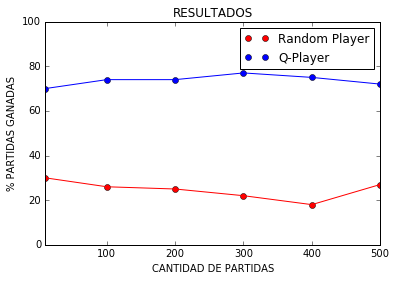

In [11]:
import numpy as np
import matplotlib.pyplot as plt


partidas=[10,100,200,300,400,500]
resultadosQPlayer=[7,74,149,232,303,363]
porcentajeQPlayer=np.multiply(resultadosQPlayer,100)/partidas
resultadosRPlayer=[3,26,51,68,73,137]
porcentajeRPlayer=np.multiply(resultadosRPlayer,100)/partidas

plt.figure()

plt.xlim([10, 500])
plt.ylim([0, 100])

#plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.xlabel('CANTIDAD DE PARTIDAS')
plt.ylabel('% PARTIDAS GANADAS')
plt.title('RESULTADOS')
plt.plot(partidas, porcentajeRPlayer,'bo',color='r',label='Random Player')
plt.plot(partidas, porcentajeRPlayer,color='r')
plt.plot(partidas, porcentajeQPlayer,'bo',label='Q-Player')
plt.plot(partidas, porcentajeQPlayer)
plt.legend()
plt.show()

Puede observarse que Q-P siempre tiene un porcentaje mucho mayor de partidas ganadas que el R-P. De acuerdo a nuestras observaciones, el porcentaje de ganancia se mantiene en un rango entre 70 % y 78 %. También hay que destacar que no hay una tendencia ni a un crecimiento ni decrecimiento constante de victorias.

Una pregunta que nos surgió durante este experimento fue si dentro de cada entrenamiento se distinguen distintos momentos de aprendizaje (al principio no puede ganar seguido por falta de conocimiento vs al final es un experto jugador y tiende a no perder partidas).

Nuestra hipotesis era: 

Dado que en la primer cuarto de las partidas jugadas, el Q-P no debería haber aprendido mucho, se espera que la diferencia contra R-P en esa parte sea menor que en el último cuarto de las partidas.

Los datos que obtuvimos fueron los siguientes:

In [12]:
import pandas as pd
partidas=[40,40,100,100,200,200,400,400]
total_ganadas=[32,32,82,78,166,155,309,324]
primer_cuarto=[8,9,18,19,40,40,79,87]
ultimo_cuarto=[8,7,23,19,42,38,75,83]
#resultadosQPlayer_primer_cuarto=[7,14,23,38,74,149,197,232,303,363,760]
#porcentajeQPlayer_primer_cuarto=np.multiply(resultadosQPlayer,100)/partidas
#resultadosQPlayer_primer_cuarto=[7,14,23,38,74,149,197,232,303,363,760]
#porcentajeQPlayer_ultimo_cuarto=np.multiply(resultadosQPlayer,100)/partidas
#resultadosRPlayer_ultimo_cuarto=[3,6,7,12,26,51,53,68,73,137,240]
#porcentajeRPlayer_ultimo_cuarto=np.multiply(resultadosRPlayer,100)/partidas


f={'Cantidad de partidas':partidas,'Partidas Ganadas':total_ganadas,'Primer Cuarto':primer_cuarto,'Ultimo Cuarto':ultimo_cuarto}
g= pd.DataFrame(f)
g= g[['Cantidad de partidas','Partidas Ganadas','Primer Cuarto','Ultimo Cuarto']]
print g

   Cantidad de partidas  Partidas Ganadas  Primer Cuarto  Ultimo Cuarto
0                    40                32              8              8
1                    40                32              9              7
2                   100                82             18             23
3                   100                78             19             19
4                   200               166             40             42
5                   200               155             40             38
6                   400               309             79             75
7                   400               324             87             83


Lamentablemente tuvimos que refutar esta hiptesis, una propuesta para trabajos futuros sería realizar esta misma evaluación con entrenamientos que consten de una mayor cantidad de partidas. 

# Experimento 3: Q-P vs Q-P

Si bien por el experimento 2 notamos que el Q-P es superior al R-P, una pregunta que nos surgió es qué ocurriría si se enfrentaran Q-P contra Q-P. Nuestras expectativas eran que no haya algun jugador que sea ampliamente superior. 

Los resultados que obtuvimos fueron los siguientes:

In [10]:
partidas=[10,20,30,50,100,200,300,400,500,1000]
resultadosQPlayer=[7,8,20,32,48,94,139,210,250,514]
porcentajeQPlayer=np.multiply(resultadosQPlayer,100)/partidas
resultadosRPlayer=[3,12,10,18,52,106,161,190,250,486]
porcentajeRPlayer=np.multiply(resultadosRPlayer,100)/partidas

pd.DataFrame({'Cantidad de partidas':partidas,'Partidos ganados Q-P (en %) ':porcentajeQPlayer})


,Cantidad de partidas,Partidos ganados Q-P (en %)
0,10,70
1,20,40
2,30,66
3,50,64
4,100,48
5,200,47
6,300,46
7,400,52
8,500,50
9,1000,51


Se nota una disminución considerable del porcentaje de victorias. Pareciera ser que al aumentar el número de partidas de entrenamiento el porcentaje de victorias de cada uno de los Q-P es cercano al 50%.

Para una mejor comparación de las distinciones obtenidas entre Q-P vs R-P y Q-P vs Q-P observemos el siguiente grafico:  

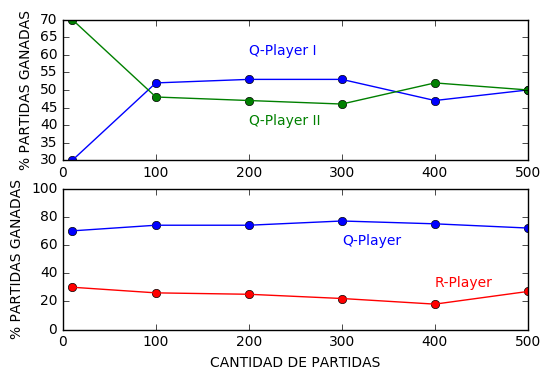

In [11]:
import numpy as np
import matplotlib.pyplot as plt

partidas=[10,100,200,300,400,500]
resultadosQPlayer=[7,48,94,139,210,250]
porcentajeQPlayer=np.multiply(resultadosQPlayer,100)/partidas
resultadosRPlayer=[3,52,106,161,190,250]
porcentajeRPlayer=np.multiply(resultadosRPlayer,100)/partidas

#---------------

#partidas=[10,100,200,300,400,500]
resultadosQPlayer1=[7,74,149,232,303,363]
porcentajeQPlayer1=np.multiply(resultadosQPlayer1,100)/partidas
resultadosRPlayer1=[3,26,51,68,73,137]
porcentajeRPlayer1=np.multiply(resultadosRPlayer1,100)/partidas


#-------------



plt.figure()
plt.xlim([0, 500])
plt.ylim([0, 100])


plt.subplot(211)
#plt.xlabel('CANTIDAD DE PARTIDAS')
plt.ylabel('% PARTIDAS GANADAS')
#plt.title('resultados')
plt.plot(partidas, porcentajeRPlayer,'bo',label='Q Player I')
plt.plot(partidas, porcentajeRPlayer)
plt.annotate('Q-Player I', xy=(200,60), xytext=(200,60), color='b')
plt.plot(partidas, porcentajeQPlayer,'bo',color='g',label='Q-Player II')
plt.plot(partidas, porcentajeQPlayer,color='g')
plt.annotate('Q-Player II', xy=(200,40), xytext=(200,40),color='g')
#plt.legend()




plt.subplot(212)
plt.xlim([0, 500])
plt.ylim([0, 100])
plt.xlabel('CANTIDAD DE PARTIDAS')
plt.ylabel('% PARTIDAS GANADAS')
#plt.title('resultados')
plt.plot(partidas, porcentajeRPlayer1,'bo',color='r',label='Q Player')
plt.annotate('Q-Player', xy=(300,60), xytext=(300,60),color='b')
plt.plot(partidas, porcentajeRPlayer1,color='r')
plt.plot(partidas, porcentajeQPlayer1,'bo',label='R-Player')
plt.plot(partidas, porcentajeQPlayer1)
plt.annotate('R-Player', xy=(400,30), xytext=(400,30),color='r')
#plt.legend()


#plt.plot(t4,t5, label="Linea 2")
plt.show()

En este caso no hay una brecha entre el porcentaje de victorias de cada jugador. Más aún, la tendencia esta próxima a la mitad de partidas para cada uno y los roles de "ganador" se van invirtiendo.

# Experimento 4 : modificación en la inicialización de la función Q(estado,acción)

Como mencionamos anteriormente, la funcion Q(estado, accion) habia sido inicializada con el valor 1. Nos preguntamos que ocurriría si la inicializaramos en valores aleatorios. Tomamos valores aleatorios entre -100,30 y 100 que son los posibles resultados de la función recompensa. Nuestra hipótesis era que esta inicialización introduciría mucho ruido y por lo tanto serían necesarias muchas más sesiones de entrenamiento para que el Q-P pueda hacer una diferencia y empezar a ganar ya que primero deberia "desaprender" el ruido introducido. Veamos los resultados obtenidos:

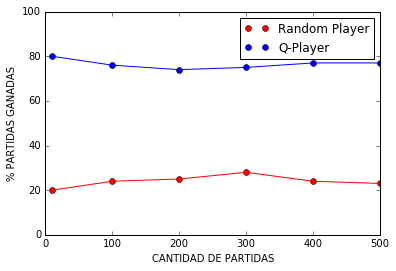

In [15]:
partidas=[10,100,200,300,400,500]
resultadosQPlayer=[8,76,149,226,311,385]
porcentajeQPlayer=np.multiply(resultadosQPlayer,100)/partidas
resultadosRPlayer=[2,24,51,84,99,115]
porcentajeRPlayer=np.multiply(resultadosRPlayer,100)/partidas


plt.figure()

plt.xlim([0, 500])
plt.ylim([0, 100])

#plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.xlabel('CANTIDAD DE PARTIDAS')
plt.ylabel('% PARTIDAS GANADAS')
#plt.title('resultados')
plt.plot(partidas, porcentajeRPlayer,'bo',color='r',label='Random Player')
plt.plot(partidas, porcentajeRPlayer,color='r')
plt.plot(partidas, porcentajeQPlayer,'bo',label='Q-Player')
plt.plot(partidas, porcentajeQPlayer)
plt.legend()

plt.show()




Si comparamos la forma de aprendizaje del Q-P cuando Q(estado,acción) se inicializa con 1 y cuando se incializa aleatoriamente entre los posibles valores de la función recompensa, obtenemos:


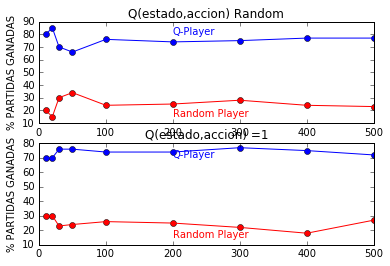

In [16]:
partidas=[10,20,30,50,100,200,300,400,500]
resultadosQPlayerr=[8,17,21,33,76,149,226,311,385]
porcentajeQPlayerr=np.multiply(resultadosQPlayerr,100)/partidas
resultadosRPlayerr=[2,3,9,17,24,51,84,99,115]
porcentajeRPlayerr=np.multiply(resultadosRPlayerr,100)/partidas

#partidas=[10,20,30,50,100,200,250,300,400,500]
resultadosQPlayer1=[7,14,23,38,74,149,232,303,363]
porcentajeQPlayer1=np.multiply(resultadosQPlayer1,100)/partidas
resultadosRPlayer1=[3,6,7,12,26,51,68,73,137]
porcentajeRPlayer1=np.multiply(resultadosRPlayer1,100)/partidas
plt.figure()

plt.xlim([0, 500])
plt.ylim([0, 100])

plt.subplot(211)
#plt.xlabel('CANTIDAD DE PARTIDAS')
plt.ylabel('% PARTIDAS GANADAS')
plt.title('Q(estado,accion) Random')
plt.plot(partidas, porcentajeRPlayerr,'bo',color='r',label='Random Player')
plt.annotate('Random Player', xy=(200, 20), xytext=(200,15),color='r')
plt.plot(partidas, porcentajeRPlayerr,color='r')
plt.plot(partidas, porcentajeQPlayerr,'bo',label='Q-Player')
plt.plot(partidas, porcentajeQPlayerr)
plt.annotate('Q-Player', xy=(200, 80), xytext=(200,80),color='b')
#plt.legend()



plt.subplot(212)
#plt.xlabel('CANTIDAD DE PARTIDAS')
plt.ylabel('% PARTIDAS GANADAS')
plt.title('Q(estado,accion) =1')
plt.plot(partidas, porcentajeRPlayer1,'bo',color='r',label='Random Player')
plt.plot(partidas, porcentajeRPlayer1,color='r')
plt.annotate('Random Player', xy=(200, 20), xytext=(200,15),color='r')
plt.plot(partidas, porcentajeQPlayer1,'bo',label='Q-Player')
plt.plot(partidas, porcentajeQPlayer1)
plt.annotate('Q-Player', xy=(200, 70), xytext=(200,70),color='b')
#plt.legend()

plt.show()

Puede observarse comparando ambos gráficos que a partir de los entrenamientos con 100 juegos, los gráficos son similares. Sin embargo, cuando comparamos los experimentos realizados con menos repeticiones se nota que cuando inicializamos de forma random a la función Q, el Q-P tiene una marcada baja en el porcentaje de victorias. Adjudicamos eso a que en el proceso de aprendizaje necesita más instancias para deshacerse del ruido, pero si se entrena lo suficiente logra resultados similares a los que se obtienen con la incialización de Q(estado,accion)=1. En cualquiera de los dos casos, la brecha entre el Q-P y el R-P es significativa.

# Experimento 5 : profundidad 1 vs profundidad 2

En los experimentos realizados hasta el momento la profundidad que consideraba el Q-P para elegir la mejor acción era 1. Quisimos indagar si el hecho de que considere una profundidad 2 daría mejores resultados. Nos hubiese gustado comparar tambien con profundidades 3 o 4 pero fueron inviables al momento de experimentar: cada decisión del jugador Q-P era muy (muy) lenta.

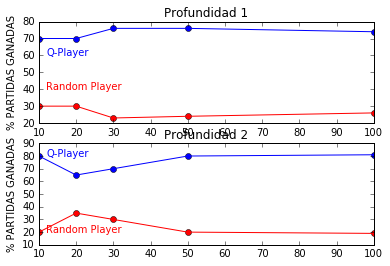

In [17]:


partidas=[10,20,30,50,100]
resultadosQPlayer2=[8,13,21,40,81]
porcentajeQPlayer2=np.multiply(resultadosQPlayer2,100)/partidas
resultadosRPlayer2=[2,7,9,10,19]
porcentajeRPlayer2=np.multiply(resultadosRPlayer2,100)/partidas


#partidas=[10,20,30,50,100]
resultadosQPlayer1=[7,14,23,38,74]
porcentajeQPlayer1=np.multiply(resultadosQPlayer1,100)/partidas
resultadosRPlayer1=[3,6,7,12,26]
porcentajeRPlayer1=np.multiply(resultadosRPlayer1,100)/partidas



plt.figure()

plt.xlim([0, 100])
plt.ylim([0, 100])

plt.subplot(212)
#plt.xlabel('CANTIDAD DE PARTIDAS')
plt.ylabel('% PARTIDAS GANADAS')
plt.title('Profundidad 2')
plt.plot(partidas, porcentajeRPlayer2,'bo',color='r',label='Random Player')
plt.plot(partidas, porcentajeRPlayer2,color='r')
plt.annotate('Random Player', xy=(10, 20), xytext=(12, 20),color='r')
plt.plot(partidas, porcentajeQPlayer2,'bo',label='Q-Player')
plt.plot(partidas, porcentajeQPlayer2)
plt.annotate('Q-Player', xy=(11, 80), xytext=(12, 80),color='b')
#plt.legend()



plt.subplot(211)
#plt.xlabel('CANTIDAD DE PARTIDAS')
plt.ylabel('% PARTIDAS GANADAS')
plt.title('Profundidad 1')
plt.plot(partidas, porcentajeRPlayer1,'bo',color='r',label='Random Player')
plt.plot(partidas, porcentajeRPlayer1,color='r')
plt.annotate('Random Player', xy=(10, 40), xytext=(12, 40),color='r')
plt.plot(partidas, porcentajeQPlayer1,'bo',label='Q-Player')
plt.plot(partidas, porcentajeQPlayer1)
plt.annotate('Q-Player', xy=(11, 60), xytext=(12, 60),color='b')
#plt.legend()

plt.show()

Contrario a lo que esperábamos podemos observar que el jugador Q-P con profundidad 2 necesita de más entrenamientos para comenzar a tener resultados similares a los que obtiene con profundidad 1. 

In [12]:
from IPython.utils.path import get_ipython_dir
print get_ipython_dir()

/home/jmperez/.ipython


/home/jmperez/.pyenv/versions/2.7.12/envs/aprendizaje/lib/python2.7/site-packages/IPython/utils/path.py:259: UserWarning: get_ipython_dir has moved to the IPython.paths module
  warn("get_ipython_dir has moved to the IPython.paths module")
